In [1]:
import numpy as np
import matplotlib
matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils       #for transforming the data later
from keras import backend as K
K.set_image_dim_ordering('th')
from scipy.misc import imsave
import math

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

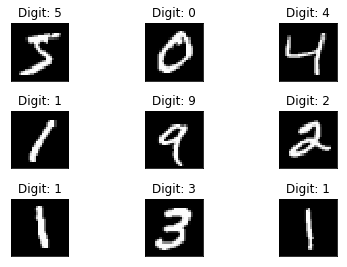

In [5]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    fig


Figure(432x288)


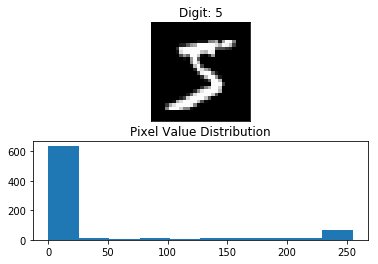

In [6]:
#let's graph the distribution of our pixel values.
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
print(fig)
# the pixel values range from 0 to 255

In [7]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print('X_test shape:', X_test.shape)
print(X_test.shape[0], 'test samples')
 

X_train shape: (60000, 28, 28)
60000 train samples
X_test shape: (10000, 28, 28)
10000 test samples


In [8]:
#reshape our inputs to a single vector vector 
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 

X_train shape: (60000, 1, 28, 28)
X_test shape: (10000, 1, 28, 28)
60000 train samples
10000 test samples


In [10]:
# normalize inputs from 0-255 to 0-1
#Normalizing the input data helps to speed up the training. 
#Also, it reduces the chance of getting stuck in local optima, 
#since we're using stochastic gradient descent to find the optimal weights for the network.
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 1, 28, 28)
Test matrix shape (10000, 1, 28, 28)


In [12]:
# one hot encode outputs
#encode our categories - digits from 0 to 9 - using one-hot encoding. 
#The result is a vector with a length equal to the number of categories. 
#The vector is all zeroes except in the position for the respective category. 
#Thus a '5' will be represented by [0,0,0,0,1,0,0,0,0].
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
def baseline_model():
	# create model
	model = Sequential()
    #In order to introduce nonlinearities into the network and elevate it beyond 
    #the capabilities of a simple perceptron we also add activation functions to the hidden layers. 
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
    #We also add dropout as a way to prevent overfitting. Here we randomly
    #keep some network weights fixed when we would normally update them so that 
    #the network doesn't rely too much on very few nodes.
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
    #The last layer consists of connections for our 10 classes and 
    #the softmax activation which is standard for multi-class targets.
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [14]:
# build the model
model = baseline_model()
# Fit the model
#how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to 
#the model's weights (batch size). Generally the bigger the batch, the more stable our stochastic gradient descent 
#updates will be
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 210s - loss: 0.2329 - acc: 0.9341 - val_loss: 0.0815 - val_acc: 0.9747
Epoch 2/10
 - 204s - loss: 0.0734 - acc: 0.9782 - val_loss: 0.0465 - val_acc: 0.9841
Epoch 3/10
 - 202s - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0424 - val_acc: 0.9862
Epoch 4/10
 - 199s - loss: 0.0405 - acc: 0.9876 - val_loss: 0.0402 - val_acc: 0.9869
Epoch 5/10
 - 195s - loss: 0.0337 - acc: 0.9893 - val_loss: 0.0342 - val_acc: 0.9888
Epoch 6/10
 - 194s - loss: 0.0278 - acc: 0.9915 - val_loss: 0.0319 - val_acc: 0.9898
Epoch 7/10
 - 193s - loss: 0.0235 - acc: 0.9926 - val_loss: 0.0352 - val_acc: 0.9889
Epoch 8/10
 - 194s - loss: 0.0204 - acc: 0.9938 - val_loss: 0.0321 - val_acc: 0.9886
Epoch 9/10
 - 194s - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0288 - val_acc: 0.9896
Epoch 10/10
 - 200s - loss: 0.0146 - acc: 0.9959 - val_loss: 0.0327 - val_acc: 0.9898
CNN Error: 1.02%
